<a href="https://colab.research.google.com/github/adityapentyala/ml-assignments/blob/master/Team08_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Details**

In [ ]:
"""
TEAM Number : 8
TEAM Members :
1. Aarav Haran
2. Saharsh Misra
3. Vaishnu Kanna
4. Aditya Pentyala
"""

'\nTEAM Number : 8\nTEAM Members :\n1. Aarav Haran\n2. Saharsh Misra\n3. Vaishnu Kanna\n4. Aditya Pentyala\n'

# **Intalling Dependencies**

In [ ]:
# # Necessary dependencies
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install tqdm

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# **Data Understanding and Preprocessing**


1. Load and inspect the dataset structure (size, variables, data types).
2. Identify numerical and categorical features.
3. Define a dependent feature as the regression target.
4. Justify the selection of numerical input features.






In [ ]:
dataset = pd.read_csv('/content/Dataset.csv')
dataset.head()

,Crop_Type,Fertilizer_Type,Nitrogen_kg_ha,Irrigation_Method,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e,Scenario_Type,Intervention_Type
0,Soybean,Synthetic,232.998485,Sprinkler,798.658484,13.900466,487.193424,42.904181,660.659923,3.832290,2.935502,1631.246917,Baseline,NaN
1,Soybean,Synthetic,141.237938,Sprinkler,713.986285,15.732909,487.193424,42.904181,588.493009,2.439946,1.520592,1102.628022,Counterfactual,Reduced_Input
2,Soybean,Synthetic,161.065486,Sprinkler,642.881174,15.332411,487.193424,42.904181,528.132205,2.406290,2.177719,1237.249832,Counterfactual,Reduced_Input
3,Soybean,Synthetic,160.219869,Sprinkler,617.580538,15.356536,487.193424,42.904181,514.285435,2.693513,1.733796,1098.294460,Counterfactual,Reduced_Input
4,Rice,Mixed,201.886213,Flood,370.524124,11.626290,1438.662645,88.281602,315.108046,15.000000,2.122508,1322.615320,Baseline,NaN


# **Exploratory Data Analysis (EDA)**
1. Compute descriptive statistics for numerical variables.
2. Visualize feature distributions using histograms and boxplots.
3. Analyze relationships between inputs and the target using scatter plots.
4. Compute and visualize a correlation matrix.
5. Include additional plots wherever useful.
6. Summarize the key observations and report at least three data-driven insights.

In [ ]:
dataset.describe()

,Nitrogen_kg_ha,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,142.765778,593.846482,23.444599,896.385823,65.242157,503.228100,2.795829,1.712855,1083.554666
std,63.900585,255.983963,7.154821,346.103652,14.428698,204.944971,2.287686,0.848229,345.869022
min,30.613614,140.869913,10.002934,300.063392,40.006735,130.719008,0.606608,-0.797407,74.320022
25%,89.472766,377.689330,17.350469,593.812110,52.875921,330.484014,1.554353,1.057614,836.134735
50%,139.421300,585.129210,23.287816,900.339261,65.244394,496.338960,2.346735,1.666316,1065.019298
75%,189.122386,794.016279,29.524868,1192.976798,77.778651,663.510866,3.149770,2.304787,1308.205666
max,299.971299,1199.878798,36.949406,1499.774383,89.997631,1005.537186,15.000000,5.086533,2635.964389


# **Linear Regression**

1. Formulate emission prediction as a regression problem.
2. Implement Linear Regression using:
    * Batch Gradient Descent
    * Stochastic Gradient Descent
3. Split data into training and testing sets.
4. Evaluate models using MAE, MSE, and R².
5. Compare optimization behavior and results using metrics and plots.
6. Visualize the results


In [ ]:
def R_square(y, y_pred):
  rss = np.sum((y-y_pred)**2)
  tss = np.sum((y-np.mean(y))**2)
  return 1 - (rss/tss)

def MAE(y, y_pred):
  return np.abs(y-y_pred).mean()

def MSE(y, y_pred):
  return np.abs(y-y_pred).mean()

def accuracy(y, y_pred):
  return (y == y_pred).mean()

class RegressionModel:
  def __init__(self, X, y):
    self.X = X
    self.y = y

    self.features = ['Const'].extend(X.columns)
    #self.target = y.columns

    self.num_features = X.shape[1] + 1
    self.weights = np.random.randn(self.num_features) * 0.01

    #self.X = np.insert(self.X, 0, 1, axis=1)

    self.train_accuracies = []
    self.val_accuracies = []
    self.train_losses = []
    self.val_losses = []
    self.test_accuracy = 0

  def forward(self, X, gradient=False):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    if gradient:
      return X_bias, np.dot(X_bias, self.weights)
    else:
      return np.dot(X_bias, self.weights)

  def backward(self, X, y, y_pred, lr=0.001, method='batch', reg=None,
               reg_lambda=0.01):
    # method can be batch or stochastic
    gradient = np.dot(X.T, (y_pred-y))/len(y) #is this right???
    if reg == 'l1':
      gradient += reg_lambda*np.sign(self.weights)/len(y)
    elif reg == 'l2':
      gradient += reg_lambda*self.weights/len(y)
    self.weights -= lr * gradient

  def train(self, X_train=None, y_train=None, epochs=1000, lr=0.05, method='batch',
              X_val=None, y_val=None, plot=False, metric='R2', reg=None,
              reg_lambda=0.01):
    self.train_accuracies = []
    self.val_accuracies = []
    self.train_losses = []
    self.val_losses = []

    if X_train is None and y_train is None:
      X_train = self.X
      y_train = self.y

    assert method in ['batch', 'stochastic'], "method must be batch, stochastic, or None"
    assert X_val == None or X_val.shape[0] == y_val.shape[0], "X_val and y_val must both be given together and have the same number of rows"
    assert X_train.shape[0] == y_train.shape[0], "X_train and y_train must have same number of rows"
    assert metric.upper() in ['R2', 'MAE', 'MSE'], "metric must be R2, MAE, or MSE"

    val = True if (X_val is not None and y_val is not None) else False
    for epoch in tqdm(range(epochs)):
      X, y_pred = self.forward(X_train, gradient=True)
      if metric.upper() == 'R2':
        train_accuracy = R_square(y_train, y_pred)
      elif metric.upper() == 'MAE':
        train_accuracy = MAE(y_train, y_pred)
      elif metric.upper() == 'MSE':
        train_accuracy = MSE(y_train, y_pred)
      loss = np.mean((y_pred - y_train)**2) / 2
      self.train_losses.append(loss)
      self.train_accuracies.append(train_accuracy)
      if val:
        y_pred_val = self.forward(X_val, gradient=False)
        if metric.upper() == 'R2':
          val_accuracy = R_square(y_val, y_pred_val)
        elif metric.upper() == 'MAE':
          val_accuracy = MAE(y_val, y_pred_val)
        elif metric.upper() == 'MSE':
          val_accuracy = MSE(y_val, y_pred_val)
        val_loss = np.mean((y_pred - y_val)**2) / 2
        self.val_accuracies.append(val_accuracy)
        self.val_losses.append(val_loss)
      self.backward(X, y_train, y_pred, lr, method=method, reg=reg, reg_lambda=reg_lambda)
    if plot:
      self.plot_accuracy(epochs, val, metric=metric)
      self.plot_loss(epochs, val)

  def test(self, X_test, y_test, metric='R2'):
    y_pred = self.forward(X_test, gradient=False)
    if metric.upper() == 'R2':
      test_accuracy = R_square(y_test, y_pred)
    elif metric.upper() == 'MAE':
      test_accuracy = MAE(y_test, y_pred)
    elif metric.upper() == 'MSE':
      test_accuracy = MSE(y_test, y_pred)
    self.test_accuracy = test_accuracy
    return test_accuracy

  def plot_accuracy(self, epochs, val=False, metric='R^2'):
    plt.figure()
    plt.title(f'{metric} over Epochs')
    plt.plot(list(range(epochs)), self.train_accuracies, label=f'Training {metric}')
    if val:
      plt.title(f'Training and Validation {metric} over Epochs')
      plt.plot(list(range(epochs)), self.val_accuracies, label=f'Validation {metric}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(f'{metric}')


  def plot_loss(self, epochs, val=False):
    plt.figure()
    plt.title('Training Loss over Epochs')
    plt.plot(list(range(epochs)), self.train_losses, label='Training Loss')
    if val:
      plt.title('Training and Validation Loss over Epochs')
      plt.plot(list(range(epochs)), self.val_losses, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')


  def summary(self):
    df = pd.DataFrame(self.weights, index=self.features, columns=['Weights'])
    return df


100%|██████████| 1000/1000 [00:01<00:00, 556.94it/s]


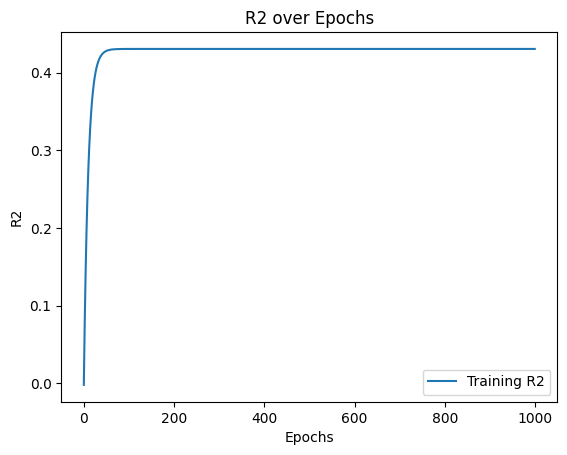

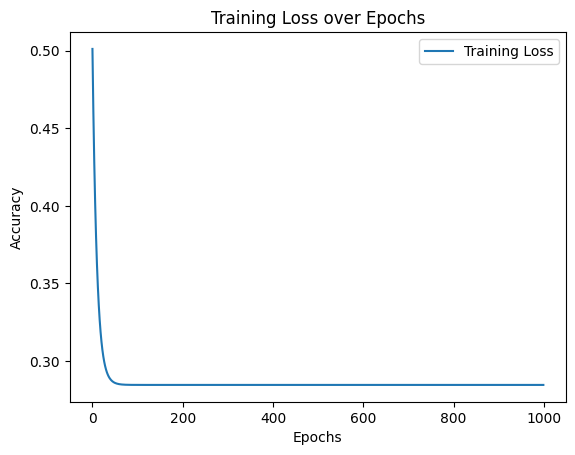

In [ ]:
# SET TRAIN AND TEST DATA HERE
X_train, y_train = dataset[['Irrigation_Water_mm', 'Avg_Temperature_C']], dataset.Total_GHG_kgCO2e

#normalize
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)

linear_model = RegressionModel(X_train, y_train)
linear_model.train(plot=True, reg='l2')

In [ ]:
linear_model.test(X_train, y_train)

np.float64(0.43068859458444675)

In [ ]:
linear_model.summary()

,Weights
0,-4.299972e-16
1,6.562811e-01
2,5.728804e-03


# **Polynomial Regression and Regularization**
1. Apply polynomial features of degree two.
2. Train polynomial regression models with:
    * L1 regularization
    * L2 regularization
3. Evaluate and compare results with linear regression.
4. Summarize the performance differences and the effects of model complexity.
5. Visualize the results

# **Classification Reformulation**
1. Convert the regression task into a classification problem by defining a clear, well-justified labeling strategy (e.g., low/medium/high emissions).
2. Apply a linear classifier:
    * Logistic Regression
    * Naive Bayes
    * Perceptron
3. Present results and discuss the suitability and limitations of the classification approach.
4. Visualize the results

# **Summary**